## import landlab

In [1]:
from landlab.io import read_esri_ascii
import landlab
import matplotlib.pyplot as plt
import statistics
import numpy as np
%matplotlib inline

## create substraction and regra3 functions

In [2]:
def calcular_substraction(grid_g1, grid_g2):
    return grid_g2 - grid_g1

In [3]:
def calcular_regra_3(grid_g1, grid_g2):
    return np.divide(grid_g2*100, grid_g1)    

In [4]:
def plot_grid_on_dem(dem, grid, name):
    if name in dem.at_node.keys():
                dem.delete_field("node",name)

    dem.add_field(name, grid, at="node", copy=True, clobber=False)
    landlab.plot.imshow.imshow_grid_at_node(dem,name,cmap='Dark2') 
    

In [11]:
def plot_substraction(mg1,mg2):
    grid_g1 = mg1.at_node["topographic__elevation"].reshape(987, 1267)
    grid_g2 = mg2.at_node["topographic__elevation"].reshape(987, 1267)
    
    substraction = calcular_substraction(grid_g1, grid_g2)
    plot_grid_on_dem(mg1, substraction, 'substraction')

In [12]:
def plot_regra_tres(mg1, mg2):
    grid_g1 = mg1.at_node["topographic__elevation"].reshape(400,400)
    grid_g2 = mg2.at_node["topographic__elevation"].reshape(400,400)
    
    resultado_regra_3 = calcular_regra_3(grid_g1, calcular_substraction(grid_g1, grid_g2))
    plot_grid_on_dem(mg1, resultado_regra_3, 'regra_3')

## importing DEMs

In [13]:
# (dem_crop, _) = read_esri_ascii("./save_asc/testes/ascii_cropadotest.asc", name="topographic__elevation")

# (dem_fse_100, _) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_100_topographic__elevation.asc", name="topographic__elevation")
# (dem_fse_200, _) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_200_topographic__elevation.asc", name="topographic__elevation")

# (dem_ed_10, _) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")
# (dem_ed_20, _) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_20_topographic__elevation.asc", name="topographic__elevation")
# (dem_ed_30, _) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_30_topographic__elevation.asc", name="topographic__elevation")



# (dem_fse_ed_10, _) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")
# (dem_fse_ed_20, _) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_20_topographic__elevation.asc", name="topographic__elevation")
# (dem_fse_ed_30, _) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_30_topographic__elevation.asc", name="topographic__elevation")


# (dem_fse_ed_10_inter, _) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado10_topographic__elevation.asc", name="topographic__elevation")
(dem_0, _) = read_esri_ascii("./testes_dispersao/dispersao_sem_ed/0_topographic__elevation.asc", name="topographic__elevation")
(dem_100, _) = read_esri_ascii("./testes_dispersao/dispersao_ed_enviar_ts_1000/100_topographic__elevation.asc", name="topographic__elevation")


## plot substraction

In [14]:
dem_0


RasterModelGrid((987, 1267), xy_spacing=(90.0, 90.0), xy_of_lower_left=(0.0, 0.0))

In [19]:
sub = dem_0.at_node['substraction'] 

sub[sub < 0] = -100
sub[sub == 1.01] = 0
sub[sub > 1.01] = 100
sub


array([ 1.01,  1.01,  1.01, ...,  1.01,  1.01,  1.01])

In [20]:
sub

array([ 100.,  100.,  100., ...,  100.,  100.,  100.])

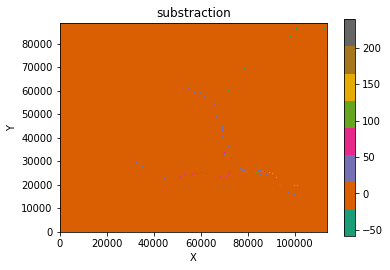

In [15]:
plot_substraction(dem_0, dem_100)

In [28]:
arr = dem_fse_ed_10_inter.at_node['topographic__elevation'] # calcula a media dos valores do terreno
ag = np.mean(arr)
ag

122.45413930117751

In [29]:
arr = dem_fse_ed_20_inter.at_node['topographic__elevation'] # calcula a media dos valores do terreno
ag = np.mean(arr)
ag

118.20050998245645

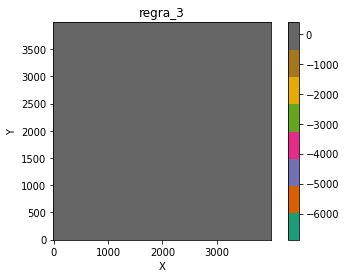

In [21]:
plot_regra_tres(dem_fse_ed_10_inter, dem_fse_ed_20_inter)

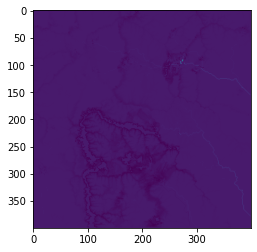

In [29]:
regra3 = dem_fse_ed_10_inter.at_node['regra_3']
regra3[regra3 < -30] = 0 
plt.imshow(regra3.reshape(400,400))

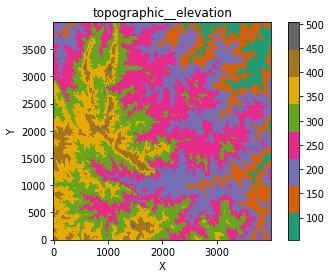

In [18]:
landlab.plot.imshow.imshow_grid_at_node(dem_crop,"topographic__elevation", cmap='Dark2') 

In [13]:
grid = dem_crop.at_node['topographic__elevation'].reshape(400,400)

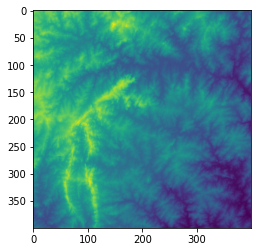

In [14]:
plt.imshow(grid)

In [12]:
dem, z = read_esri_ascii("./testes_dispersao/asc_crop_ed_time_step_100/10_topographic__elevation.asc", name="topographic__elevation")

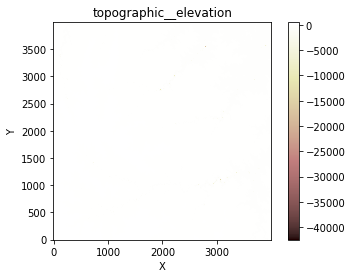

In [13]:
landlab.plot.imshow.imshow_grid_at_node(dem,"topographic__elevation") 